In [8]:


from utils import *

%matplotlib inline
# jupyters notebook Befehl zum direkten Anzeigen von Matplotlib Diagrammen
plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True 
plt.rcParams['xtick.labelsize'] = plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['xtick.major.size'] = plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.major.width'] = plt.rcParams['ytick.major.width'] = 1.6
plt.rcParams['font.size'] = 12

from dust_extinction.parameter_averages import G23 as ext_model


Here you have to set the path where the files are

In [9]:

dust_path='./Q-curves/fitting-Qcurves/Q_GRF/'
slab_folder='./LineData/'

# examples

Below you find a list of use cases for the model

## Varibale dicts

First you see example dictonaries with all the input parameters

- distance: distance to object in pc


- tstar: stellar temperature in Kelvin
- rstar: stellar radius in solar radii
- bb_star: bool, True: using the stellar temperature to create a Black body, False: using input spectum (read_data(stellar_file))


- if t_rim is set: rim is black body with temperature t_rim


- if tmax_rim, tmin_rim, and q_rim are set: rim is temperature power law distribution


    - tmax_rim: maximum temperature of inner rim
    - tmin_rim: minimum temperature of inner rim
    - q_rim: exponent of the temperature powerlaw distribution
    - sc_rim: scale factor of the rim

- tmax_mp: maximum temperature of midplane
- tmin_mp: minimum temperature of midplane
- q_mid: exponent of the temperature powerlaw distribution
- sc_mid: scale factor of the midplane


- tmax_s: maximum temperature of surface layer
- tmin_s: minimum temperature of surface layer
- q_thin: exponent of the temperature powerlaw distribution

- the species (their Q-files) and their scaling factors (sc) are defined in dust_species

- q_emis: exponent of the temperature powerlaw distribution for the molecular layer




In [10]:
# this dictionary has a single temperature for the inner rim
var_dict={'tstar':9000,
         'rstar':2.5,
         'distance':140,
         't_rim':1500.6,
         'tmin_s':50.3,
         'tmax_s':1000.1,
         'tmin_mp':99.3,
         'tmax_mp':1100.4,
         'sc_ir':1e-17,
         'sc_mid':2e-7,
         'q_mid':-0.6,
         'q_thin':-0.55,
#         'q_emis':-0.55,
         'q_emis':-0.55,
         'bb_star':True,
         'incl':0.0,
         }


## Abundance dict

The second dictonary that is needed to run the model is the abundance_dict.

It sets what dust components are used and their scale factors.

The names of the species should be their file names.

with dust_path you can specify the folder in which there files are


In [11]:
#here all factors are the same, but they can be different of course
test_fac=5e-8
test_fac_crystal=1e-8

abundance_dict={'MgOlivine0.1.Combined.Kappa_rv0.1.dat':test_fac,
                'MgOlivine2.0.Combined.Kappa_rv2.0.dat':test_fac,
                'MgOlivine5.0.Combined.Kappa_rv5.0.dat':test_fac,
                
                
                'MgPyroxene0.1.Combined.Kappa_rv0.1.dat':test_fac,
                'MgPyroxene2.0.Combined.Kappa_rv2.0.dat':test_fac,
                'MgPyroxene5.0.Combined.Kappa_rv5.0.dat':test_fac,

                'Enstatite0.1.Combined.Kappa_rv0.1.dat':test_fac_crystal,
                'Enstatite2.0.Combined.Kappa_rv2.0.dat':test_fac_crystal,
                'Enstatite5.0.Combined.Kappa_rv5.0.dat':test_fac_crystal,

                'Forsterite0.1.Combined.Kappa_rv0.1.dat':test_fac_crystal,
                'Forsterite2.0.Combined.Kappa_rv2.0.dat':test_fac_crystal,
                'Forsterite5.0.Combined.Kappa_rv5.0.dat':test_fac_crystal}

# Slab dict

The third dictonary needed to run the model is the slab dict.

It contains all molecules for which the emission should be included in the model

Every molecule has a column density range, a temperature range and an emitting radius (scale factor).  
You can also run it with a single value for the column density or a single value for both temperature and column density.

- ColDens: fixed column density  
or  
- ColDens_tmin: column density at tmin
- ColDenstmax: column density at tmax

- temis: emission temperature  
or   
- tmin: minimum emission temperature
- tmax: maximum emission temperature

- radius: inner radius where the temperature power law starts (for t-ranges), for single value temperatures it is the radius of the emitting area

In [12]:
slab_dict={'H2O':{'ColDens_tmax':1e17,
                  'ColDens_tmin':1e16,
                    'tmax':655.1,
                    'tmin':420.6,
                    'radius':1
                    },

          }



## running the model

To run the model you need to do 3 steps

- initialize
- read in the data
- run the model

### step one

initializing is done with
continuum_model()

you should save that under a name ({name_model})


In [13]:

mod=complete_model()


In [14]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=5,lambda_n=20,R=200)

In [15]:
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)


278
Folder to be searched for pre-binned data:
['./LineData//binned_data/0', './LineData//binned_data/1', './LineData//binned_data/2', './LineData//binned_data/3', './LineData//binned_data/4', './LineData//binned_data/5', './LineData//binned_data/6', './LineData//binned_data/7']
Searching:
./LineData//binned_data/0/wavelength.npy
True
Searching:
./LineData//binned_data/1/wavelength.npy
True
Searching:
./LineData//binned_data/2/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
./LineData//binned_data/2
-----------------------------
Found data for H2O
Checking for molecular data
-------
There are not all parameters for the absorp layer set!!!
tmax_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
tmin_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
q_abs is not defined
-------
Precalculating Black bodies


### Running the model


Init 4.291534423828125e-05
Star 0.000408172607421875
Inner rim 0.00010085105895996094
Midplane 0.00045013427734375
Surface 0.0005619525909423828
Emission 0.0002620220184326172
Summing up 1.2874603271484375e-05


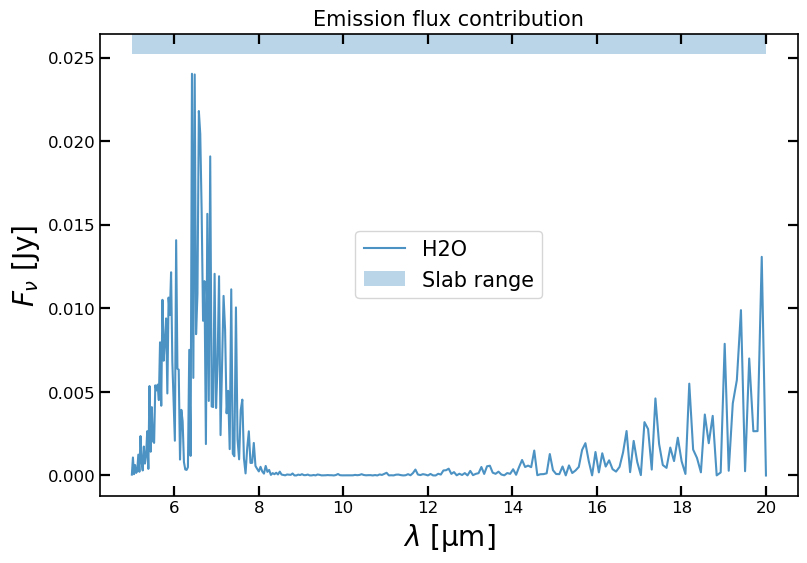

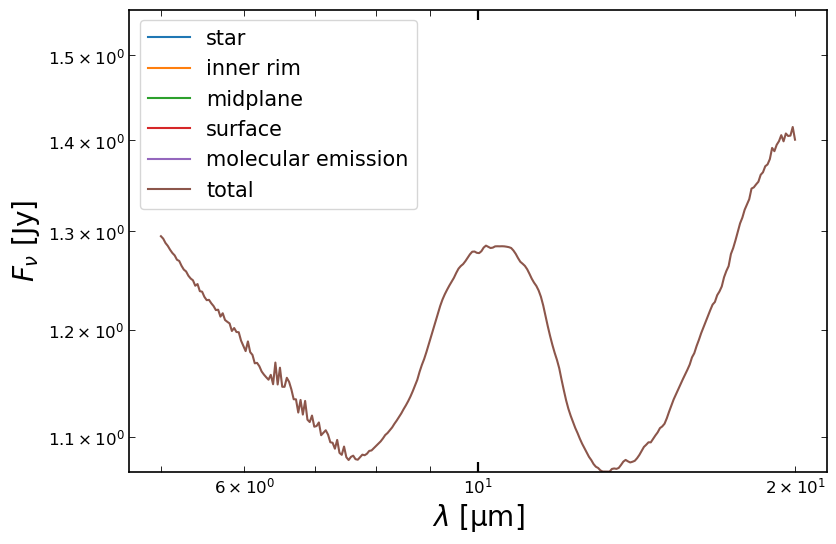

In [16]:

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model


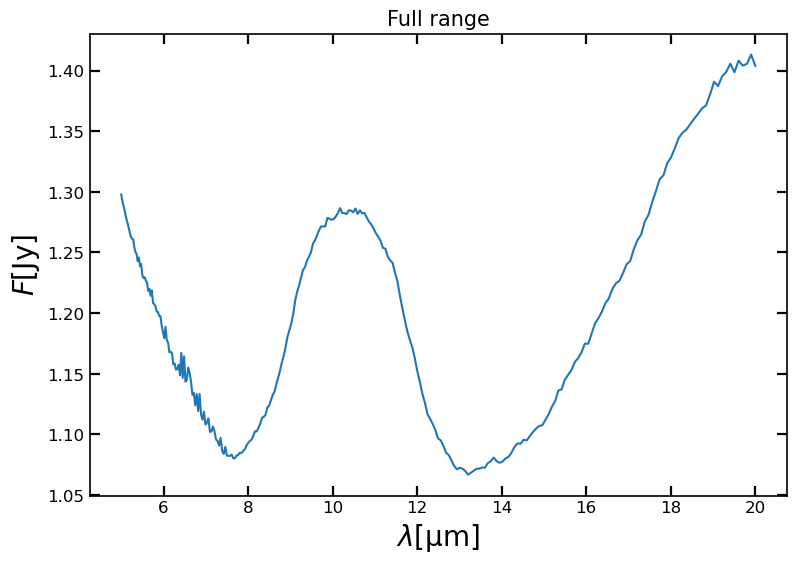

In [17]:
#plt.plot(mod.xnew,mod.tot_flux)
flux_noise=np.random.normal(1,0.001,len(mod.tot_flux))*mod.tot_flux
plt.plot(mod.xnew,flux_noise)
plt.xlabel(r'$\lambda \rm[\mu m]$')
plt.ylabel(r'$F\rm[Jy]$')
plt.title('Full range')
plt.savefig('./Observations/full_range.png',bbox_inches='tight')
plt.show()

In [18]:
np.save('./Observations/full_range_flux.npy',flux_noise)
np.save('./Observations/full_range_wave.npy',mod.xnew)
print(np.shape(mod.xnew))

(278,)


363
Folder to be searched for pre-binned data:
['./LineData//binned_data/0', './LineData//binned_data/1', './LineData//binned_data/2', './LineData//binned_data/3', './LineData//binned_data/4', './LineData//binned_data/5', './LineData//binned_data/6']
Searching:
./LineData//binned_data/0/wavelength.npy
True
Searching:
./LineData//binned_data/1/wavelength.npy
True
Searching:
./LineData//binned_data/2/wavelength.npy
True
Searching:
./LineData//binned_data/3/wavelength.npy
True
Searching:
./LineData//binned_data/4/wavelength.npy
True
Searching:
./LineData//binned_data/5/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
./LineData//binned_data/5
-----------------------------
Found data for CO2
Checking for molecular data
Found data for HCN
Checking for molecular data
Found data for C2H2
Checking for molecular data
Found data for H2O
Checking for molecular data
-------
There are not all parameters for the absorp layer set!!!
tmax_abs is not defined
-------
-----

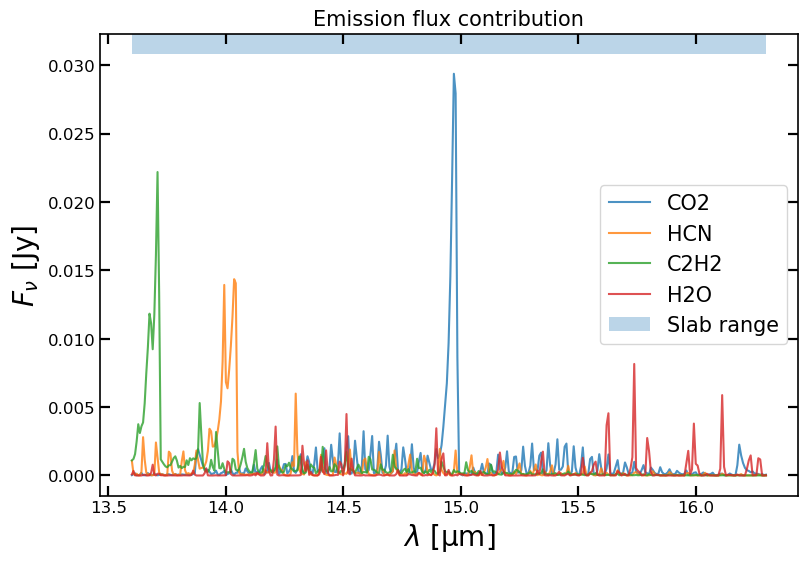

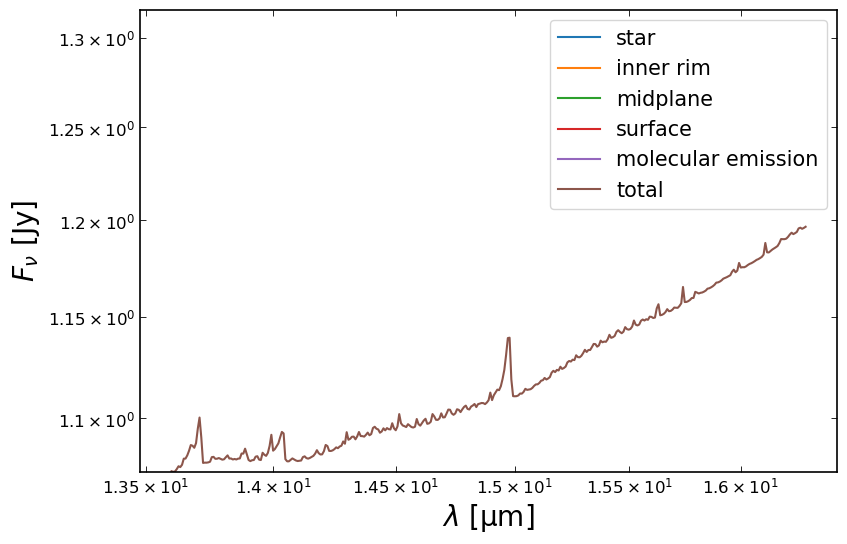

In [ ]:
slab_dict={
            'CO2':{'ColDens':1e16,
                    'temis':500,
                     'radius':0.4
                    },
            'HCN':{'ColDens':5e15,
                    'temis':500,
                     'radius':0.5
                    },
            'C2H2':{'ColDens':1e16,
                    'temis':600,
                     'radius':0.2
                     
                    },
            'H2O':{'ColDens':1e17,
                    'tmax':655.1,
                    'tmin':420.6,
                    'r_area':1
                    },

          }


# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=13.6,lambda_n=16.3,R=2000)
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model



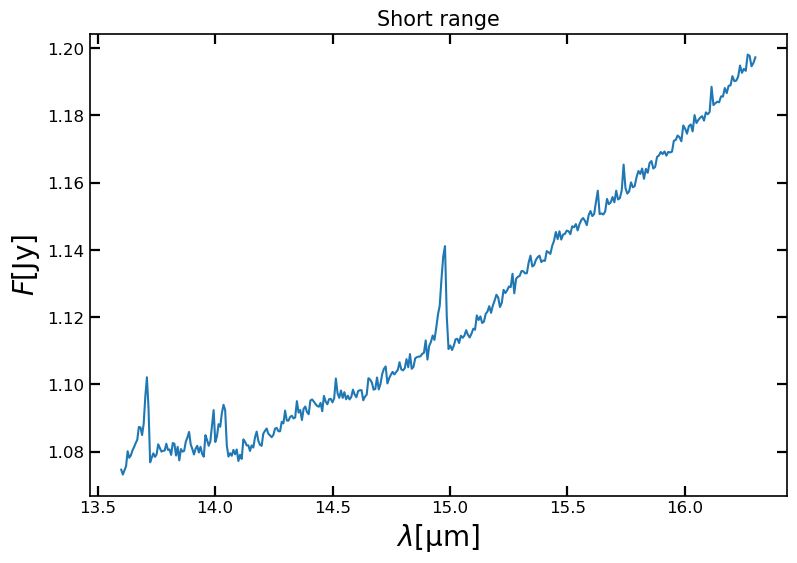

In [23]:
#plt.plot(mod.xnew,mod.tot_flux)
flux_noise=np.random.normal(1,0.001,len(mod.tot_flux))*mod.tot_flux
plt.plot(mod.xnew,flux_noise)
plt.xlabel(r'$\lambda \rm[\mu m]$')
plt.ylabel(r'$F\rm[Jy]$')
plt.title('Short range')
plt.savefig('./Observations/short_range.png',bbox_inches='tight')
plt.show()

In [24]:
np.save('./Observations/short_range_flux.npy',flux_noise)
np.save('./Observations/short_range_wave.npy',mod.xnew)
print(np.shape(mod.xnew))

(363,)


182
Folder to be searched for pre-binned data:
['./LineData//binned_data/0', './LineData//binned_data/1', './LineData//binned_data/2', './LineData//binned_data/3', './LineData//binned_data/4', './LineData//binned_data/5', './LineData//binned_data/6']
Searching:
./LineData//binned_data/0/wavelength.npy
True
Searching:
./LineData//binned_data/1/wavelength.npy
True
Searching:
./LineData//binned_data/2/wavelength.npy
True
Searching:
./LineData//binned_data/3/wavelength.npy
True
Searching:
./LineData//binned_data/4/wavelength.npy
True
-----------------------------
Found pre-binned data folder!
./LineData//binned_data/4
-----------------------------
Found data for CO2
Checking for molecular data
-------
There are not all parameters for the absorp layer set!!!
tmax_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
tmin_abs is not defined
-------
-------
There are not all parameters for the absorp layer set!!!
q_abs is not defined
-------
Precalculatin

Init 1.5020370483398438e-05
Star 4.601478576660156e-05
Inner rim 0.000102996826171875
Midplane 0.0003979206085205078
Surface 0.0003981590270996094
Emission 3.886222839355469e-05
Summing up 1.0013580322265625e-05


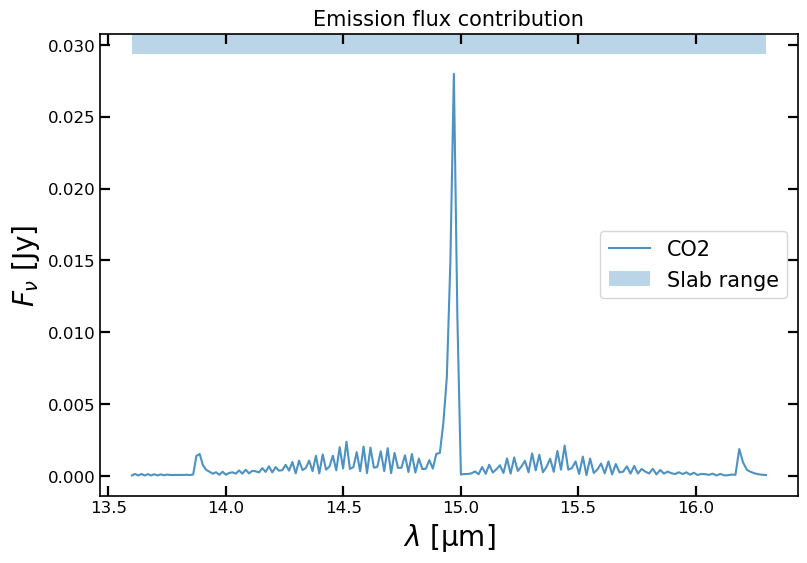

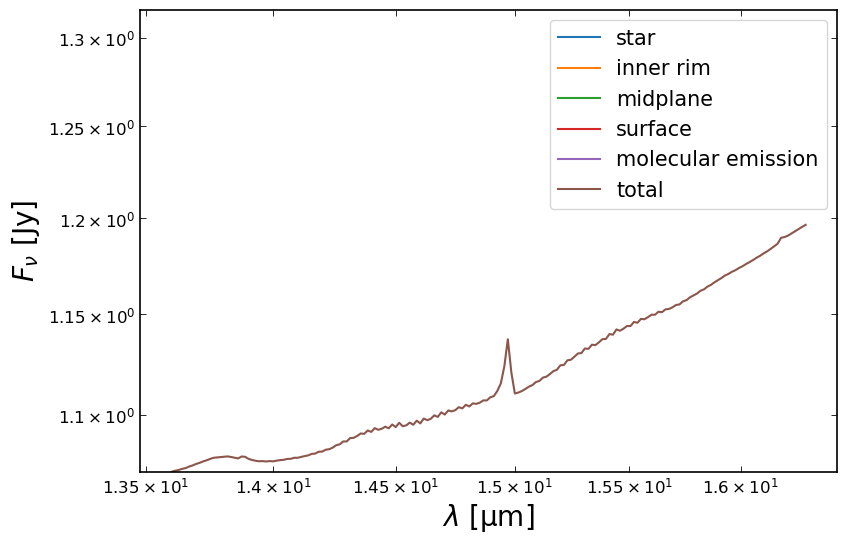

In [25]:
# creating a wavelength grid on which the fluxes are calculated
wavelength=generate_grid(lambda_0=13.6,lambda_n=16.3,R=1000)
#wavelength=10**np.linspace(np.log10(4),np.log10(30),5000)
print(len(wavelength))

slab_dict={'CO2':{'ColDens':1e16,
                    'temis':500,
                     'radius':0.4
                    }}
mod=complete_model()
mod.read_data(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,wavelength_points=wavelength,
              slab_prefix='15_',save_binned_data=True,load_binned_data=True,slab_folder=slab_folder,dust_path=dust_path,ext_model=ext_model)

mod.run_model(variables=var_dict,dust_species=abundance_dict,slab_dict=slab_dict,output_all=False,timeit=True)
mod.plot() #this plots the final model



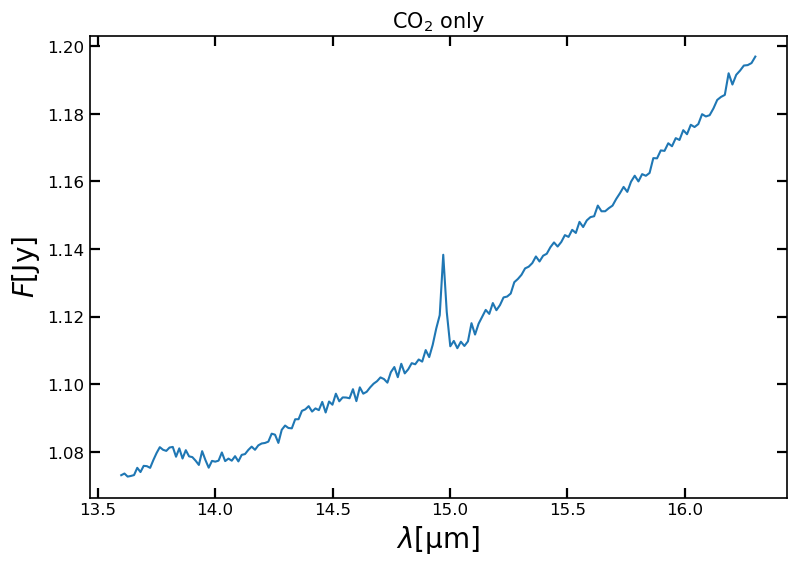

In [27]:
#plt.plot(mod.xnew,mod.tot_flux)
flux_noise=np.random.normal(1,0.001,len(mod.tot_flux))*mod.tot_flux
plt.plot(mod.xnew,flux_noise)
plt.xlabel(r'$\lambda \rm[\mu m]$')
plt.ylabel(r'$F\rm[Jy]$')
plt.title(r'$\rm CO_2$ only')
plt.savefig('./Observations/co2_only.png',bbox_inches='tight')
plt.show()

In [157]:
np.save('./Observations/co2_only_flux.npy',flux_noise)
np.save('./Observations/co2_only_wave.npy',mod.xnew)
print(np.shape(mod.xnew))

(182,)
